# Mining novel cis-regulatory elements 

Load required custom functions and R libraries and uncompress the necessary files.

## <span style="color:red;font-size:14px;">Run the installation if you are using colab</span>

In [ ]:
# Download data
system('wget https://github.com/computational-chemical-biology/cis_reg/raw/master/aux_data.zip')
system('wget https://github.com/computational-chemical-biology/cis_reg/raw/master/metadata.zip')
unzip('aux_data.zip')
unzip('metadata.zip')

In [ ]:
# Install and load packages
source('https://raw.githubusercontent.com/computational-chemical-biology/cis_reg/master/install_packages.R')
source('https://raw.githubusercontent.com/computational-chemical-biology/cis_reg/master/custom_api.R')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Installing package(s) 'BiocVersion', 'Rgraphviz', 'png', 'KEGGgraph',
  'org.Hs.eg.db', 'gage', 'pathview', 'DESeq2', 'tximport', 'universalmotif'

also installing the dependencies ‘formatR’, ‘plogr’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘xtable’, ‘bitops’, ‘RSQLite’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘annotate’, ‘graph’, ‘XML’, ‘RCurl’, ‘AnnotationDbi’, ‘KEGGREST’, ‘GO.db’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘Rcpp’, ‘RcppArmadillo’, ‘Biostrings’, ‘RcppThread’


Old pac

## <span style="color:red;font-size:14px;">Load packages and data if you installed using conda</span>

In [ ]:
source('custom_api.R')
unzip('aux_data.zip')
unzip('metadata.zip')

## Read abundance files and make it ready to deseq analysis.

In [ ]:
dds <- cast_deseq2(abundance_dir = "aux_data/Abundance_Sugarcane",
                   sample_cond = "metadata/sample_condition_cane.csv",
                   tx_to_gene = "metadata/tx2gene_lu.csv")
table(dds$condition)
dds$sample

Note: importing `abundance.h5` is typically faster than `abundance.tsv`

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
reading in files with read_tsv

1 
2 
3 
4 
5 
6 


summarizing abundance

summarizing counts

summarizing length

using counts and average transcript lengths from tximport




time_0h time_8h 
      3       3 

[1] time0h_1_abundance  time0h_2__abundance time0h_3__abundance
[4] time8h_1_abundance  time8h_2_abundance  time8h_3_abundance 
6 Levels: time0h_1_abundance time0h_2__abundance ... time8h_3_abundance

## ‘results’ extracts a result table from a DESeq analysis. Use `?results` to check.

In [ ]:
dds <- DESeq(dds)
res <- results(dds)
cane <- results(dds, contrast=c("condition", "time_8h", "time_0h"))
cane_filter = filter_DE_genes(cane)

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
head(cane)

log2 fold change (MLE): condition time_8h vs time_0h 
Wald test p-value: condition time 8h vs time 0h 
DataFrame with 6 rows and 6 columns
      baseMean log2FoldChange     lfcSE       stat      pvalue        padj
     <numeric>      <numeric> <numeric>  <numeric>   <numeric>   <numeric>
8497   220.219       0.373965  0.212450   1.760247 7.83660e-02 1.10852e-01
8498   388.102      -0.196611  0.200182  -0.982161 3.26021e-01 3.91870e-01
8499   544.954      -1.109848  0.245112  -4.527917 5.95679e-06 1.63314e-05
8500 26920.454      -2.634547  0.204480 -12.884146 5.52843e-38 1.14862e-36
8501   324.776      -0.174531  0.309735  -0.563486 5.73104e-01 6.32559e-01
8502  1950.878      -0.695216  0.205065  -3.390217 6.98373e-04 1.44453e-03

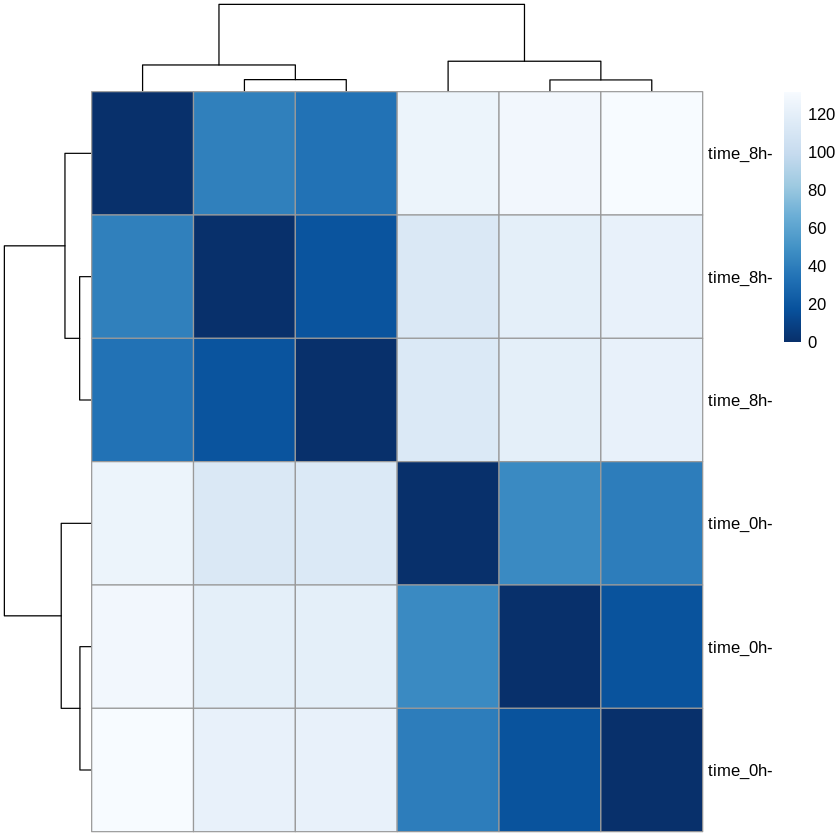

In [ ]:
sample_check(dds)

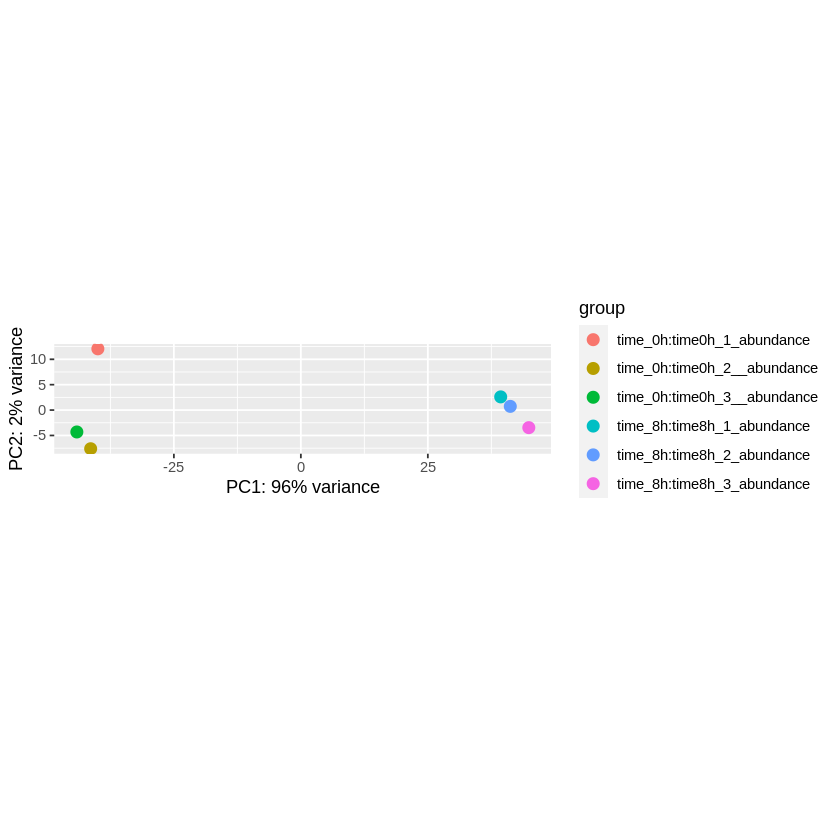

In [ ]:
vsd <- vst(dds, blind=FALSE)
plotPCA(vsd, intgroup=c("condition", "sample")) 

In [ ]:
head(dds@assays@data[[1]])

,time0h_1,time0h_2_,time0h_3_,time8h_1,time8h_2,time8h_3
8497,238,212,187,261,237,179
8498,518,479,382,296,394,294
8499,579,1090,842,381,307,251
8500,36993,65766,53221,6732,7233,6259
8501,524,346,269,352,266,213
8502,1928,3516,2685,1370,1482,1195


In [ ]:
head(vsd@assays@data[[1]])

,time0h_1,time0h_2_,time0h_3_,time8h_1,time8h_2,time8h_3
8497,8.099776,7.746682,7.854065,8.368931,8.167302,8.093983
8498,9.079049,8.740204,8.726843,8.527186,8.802108,8.705258
8499,9.226045,9.830203,9.773639,8.848648,8.485462,8.505990
8500,15.100526,15.664252,15.672040,12.837924,12.841476,12.946700
8501,9.094408,8.329778,8.287413,8.746542,8.307824,8.302890
8502,10.875478,11.465148,11.388988,10.579917,10.592054,10.594852


In [ ]:
feat.pca <- prcomp(t(vsd@assays@data[[1]]), center = TRUE, scale = TRUE)

In [ ]:
library(RColorBrewer)

cols <- brewer.pal(ncol(dds@assays@data[[1]]), "BrBG")
cols

[1] "#8C510A" "#D8B365" "#F6E8C3" "#C7EAE5" "#5AB4AC" "#01665E"

In [ ]:
colnames(dds@assays@data[[1]])

[1] "time0h_1"  "time0h_2_" "time0h_3_" "time8h_1"  "time8h_2"  "time8h_3"

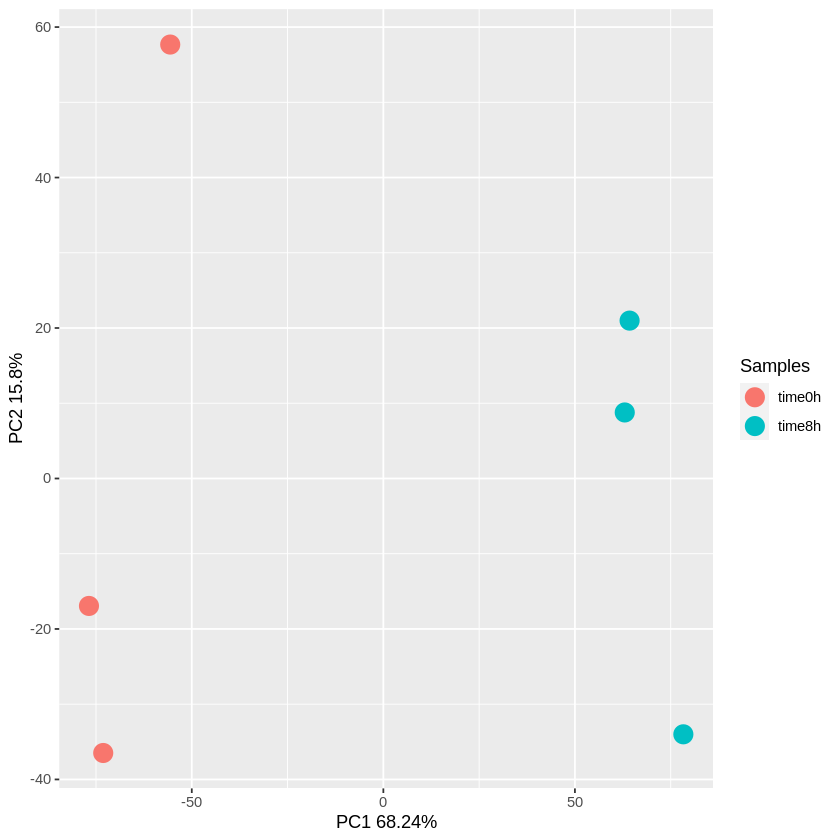

In [ ]:
sdev <- feat.pca$sdev^2
eig <- sdev/sum(sdev)

snames <- c('time0h', 'time0h', 'time0h', 'time8h', 'time8h', 'time8h')

pca.scores <- data.frame(x=feat.pca$x[,1], y=feat.pca$x[,2], Samples=as.factor(snames))

ggplot(pca.scores, aes(x=x, y=y, color=Samples)) +
       geom_point(size=5)+
       xlab(paste0('PC1 ', round(eig[1]*100,2), '%'))+
       ylab(paste0('PC2 ', round(eig[2]*100,2), '%'))

## Repeating DESeq2 analysis for stress conditions.

In [ ]:
dds <- cast_deseq2(abundance_dir = "aux_data/Abundance_Stresses",
                   sample_cond = "metadata/sample_condition_stress.csv",
                   tx_to_gene = "metadata/tx2gene_lu.csv")
table(dds$condition)
dds$samples

Note: importing `abundance.h5` is typically faster than `abundance.tsv`

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 


summarizing abundance

summarizing counts

summarizing length

using counts and average transcript lengths from tximport




  control ethanol_1 ethanol_2  temp_37C  temp_42C 
        3         3         3         3         3 

[1] 01_abundance 02_abundance 03_abundance 04_abundance 05_abundance
 [6] 06_abundance 07_abundance 08_abundance 09_abundance 10_abundance
[11] 11_abundance 12_abundance 13_abundance 14_abundance 15_abundance
15 Levels: 01_abundance 02_abundance 03_abundance 04_abundance ... 15_abundance

In [ ]:
#differential expression analysis
dds <- DESeq(dds)
res <- results(dds)
#contrasting
#need to be extended in the case of more conditions 
T37 <- results(dds, contrast=c("condition", "temp_37C", "control"))
T42 <- results(dds, contrast=c("condition", "temp_42C", "control"))
Et1 <- results(dds, contrast=c("condition", "ethanol_1", "control"))
Et2 <- results(dds, contrast=c("condition", "ethanol_2", "control"))

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



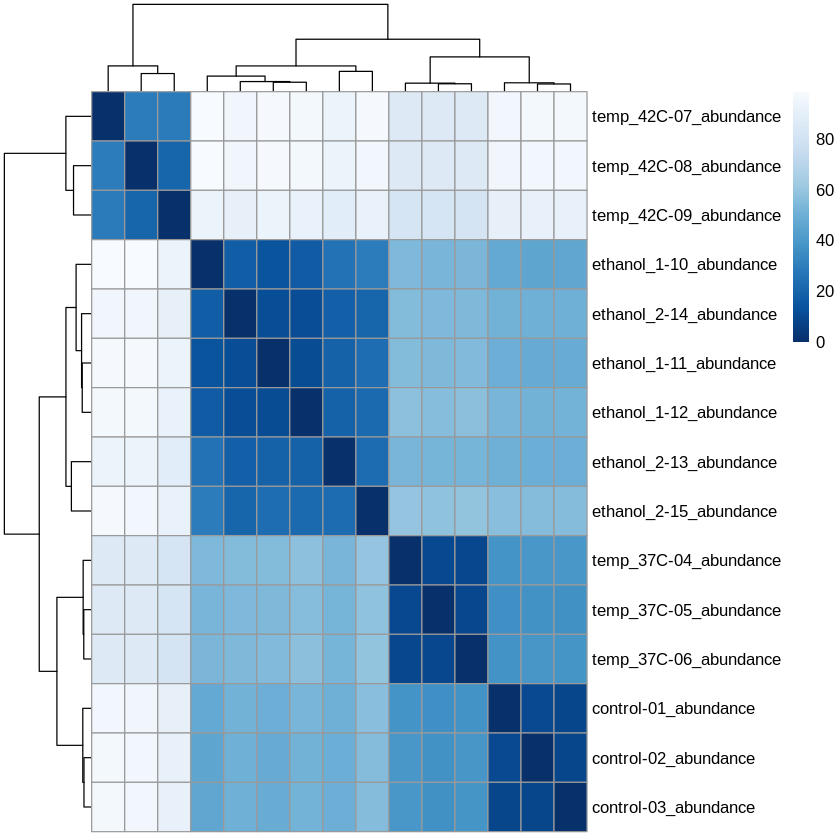

In [ ]:
sample_check(dds)

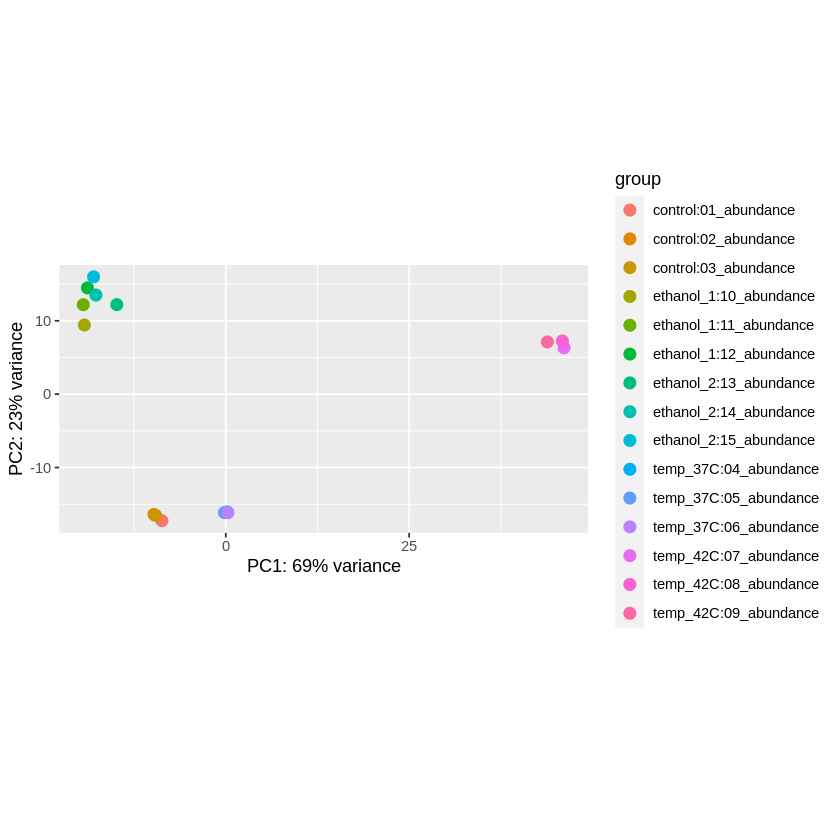

In [ ]:
vsd <- vst(dds, blind=FALSE)
plotPCA(vsd, intgroup=c("condition", "samples"))

In [ ]:
head(dds@assays@data[[1]])

,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15
8497,513,382,472,297,342,286,98,145,171,300,319,341,656,262,240
8498,679,547,731,795,735,727,1328,1564,1685,806,824,1039,1893,684,633
8499,534,379,452,394,397,366,377,541,532,279,296,329,644,272,191
8500,6949,5521,7030,4632,5626,4693,1484,1601,1823,2983,2969,3661,6722,2321,2777
8501,612,469,543,438,555,427,249,332,414,265,230,270,494,154,170
8502,2319,1887,2214,2095,2361,2052,1910,2097,1957,2393,2372,2969,5074,1925,2027


In [ ]:
dds@colData$condition

[1] control   control   control   temp_37C  temp_37C  temp_37C  temp_42C 
 [8] temp_42C  temp_42C  ethanol_1 ethanol_1 ethanol_1 ethanol_2 ethanol_2
[15] ethanol_2
Levels: control ethanol_1 ethanol_2 temp_37C temp_42C

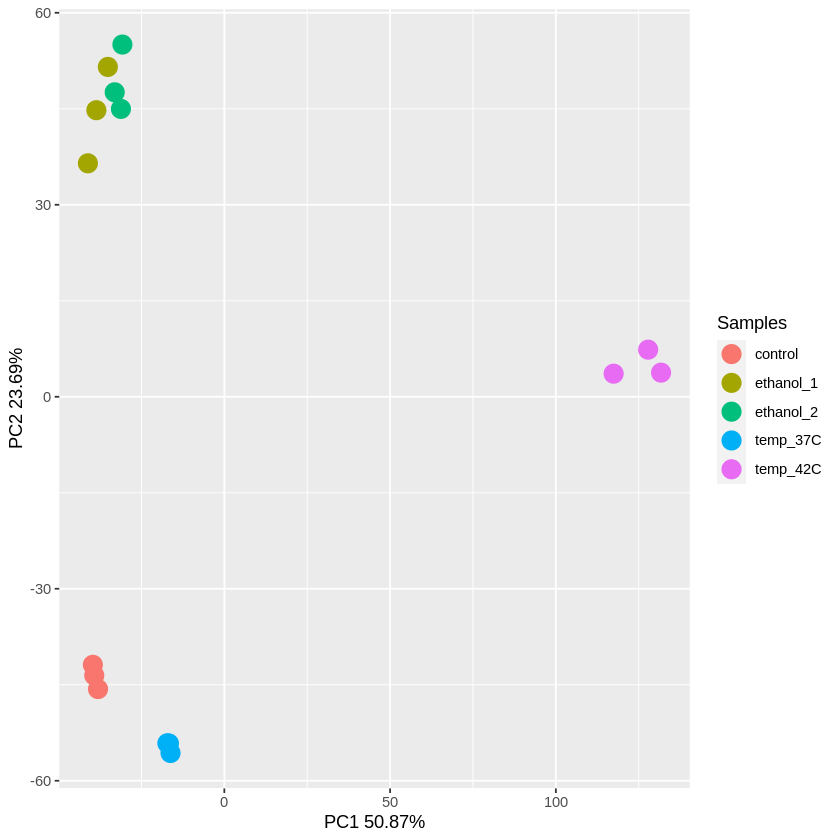

In [ ]:
feat.pca <- prcomp(t(vsd@assays@data[[1]]), center = TRUE, scale = TRUE)

sdev <- feat.pca$sdev^2
eig <- sdev/sum(sdev)

pca.scores <- data.frame(x=feat.pca$x[,1], y=feat.pca$x[,2], Samples=dds@colData$condition)

ggplot(pca.scores, aes(x=x, y=y, color=Samples)) +
       geom_point(size=5)+
       xlab(paste0('PC1 ', round(eig[1]*100,2), '%'))+
       ylab(paste0('PC2 ', round(eig[2]*100,2), '%'))

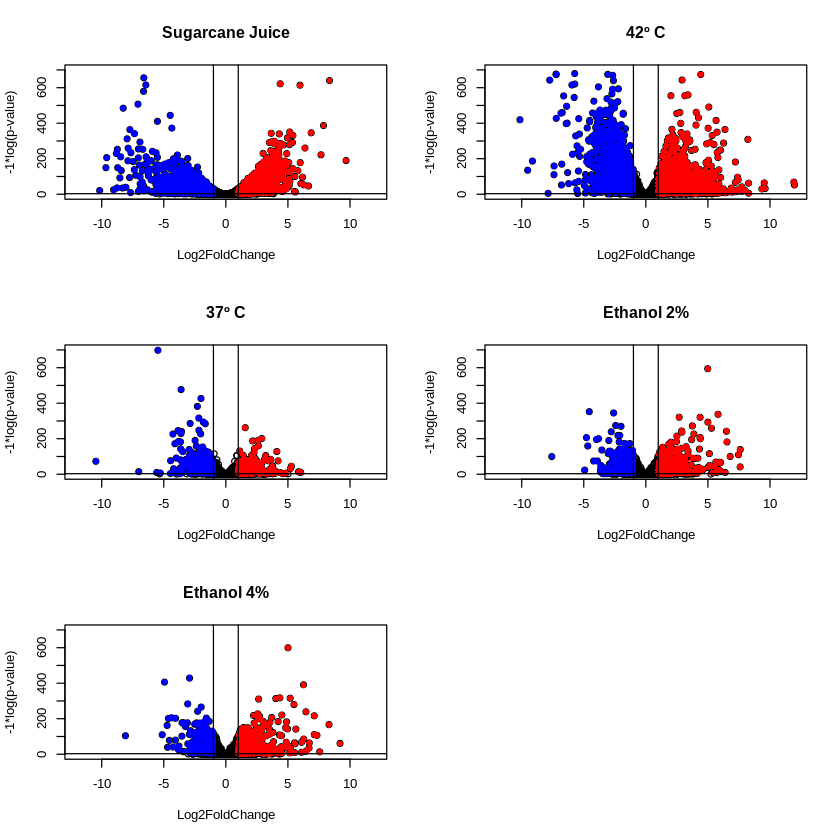

In [ ]:
par(mfrow=c(3,2))
volcano_plot(cane, "Sugarcane Juice")
volcano_plot(T42, "42º C")
volcano_plot(T37, "37º C")
volcano_plot(Et1, "Ethanol 2%")
volcano_plot(Et2, "Ethanol 4%")

## Comparing condition dependent gene expression

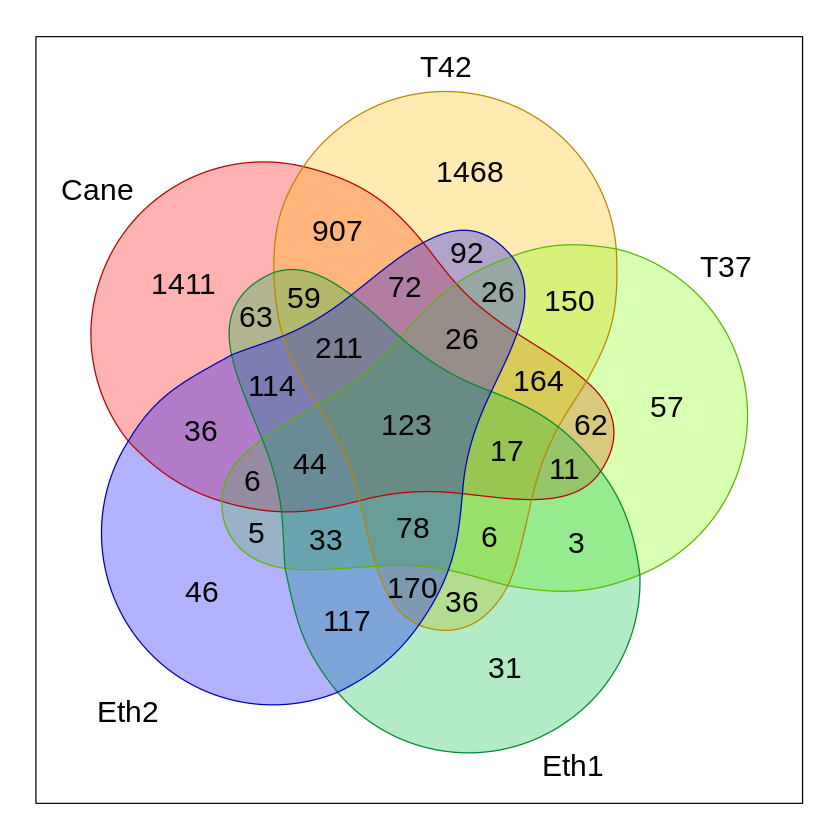

In [ ]:
T37_filter <- filter_DE_genes(T37)
T42_filter <- filter_DE_genes(T42)
Et1_filter <- filter_DE_genes(Et1)
Et2_filter <- filter_DE_genes(Et2)

i37  = row.names(T37_filter)
i42  = row.names(T42_filter)
icane  = row.names(cane_filter)
iet1  = row.names(Et1_filter)
iet2  = row.names(Et2_filter)

x = list(Cane=icane, T42=i42, T37=i37, Eth1=iet1, Eth2=iet2)
venn::venn(x, ilab=TRUE, zcolor = "style", plotsize = 17, ilcs = 1.5, sncs = 1.5)

## Functional annotation

Path,p.geomean,stat.mean,p.val,q.val,set.size,exp1
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
Ribosome,3.06729019823202e-09,6.12079948519788,3.06729019823202e-09,5.55179525879995e-07,113,3.06729019823202e-09
DNA replication,8.50922329353751e-07,5.35344335514392,8.5092232935375e-07,5.16140862053827e-05,30,8.50922329353751e-07
Cell cycle - yeast,8.55482091801923e-07,4.98519854179064,8.55482091801923e-07,5.16140862053827e-05,78,8.55482091801923e-07
Biosynthesis of amino acids,7.19482457121106e-05,3.89106818672495,7.19482457121106e-05,0.003255658118473,88,7.19482457121106e-05
Cell cycle,0.000281530757303247,3.57700305040908,0.000281530757303248,0.0101914134143776,47,0.000281530757303247
Amino sugar and nucleotide sugar metabolism,0.00112724034778185,3.24477248691714,0.00112724034778185,0.0291472147069307,23,0.00112724034778185
Oxidative phosphorylation,0.00139091716276188,3.08091178529984,0.00139091716276188,0.0314695008074875,72,0.00139091716276188
Purine metabolism,0.00178947455432577,2.9956557424076,0.00178947455432578,0.0324572616966508,44,0.00178947455432577
Sulfur metabolism,0.00374277587917267,2.92725587047823,0.00374277587917267,0.0615856758300231,14,0.00374277587917267


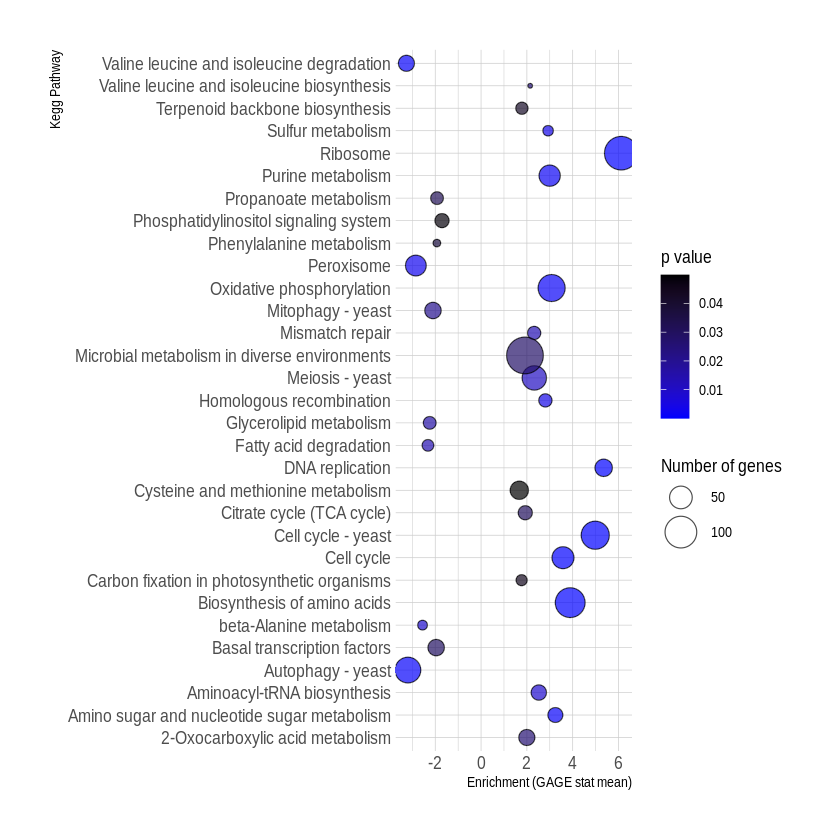

In [ ]:
cane_gg = read.csv2(file = "aux_data/kegg_path/cane_pathways/cane_plot.csv",
                    sep=",", stringsAsFactors = F,)

cane_gg
cane_gg$p.val = as.numeric(cane_gg$p.val)
cane_gg$stat.mean = as.numeric(cane_gg$stat.mean)


ggplot(data = cane_gg, aes(x=stat.mean, y=Path, size=set.size, fill=p.val)) +
  geom_point(alpha=0.70, shape=21, color="black") +
  scale_fill_gradient(low = "blue", high = "black", na.value = NA, name="p value")+
  scale_size(range = c(1, 10), name = "Number of genes") +
  theme_ipsum() +
  ylab("Kegg Pathway") +
  xlab("Enrichment (GAGE stat mean)")

In [ ]:
#func_analy(base = "kog", data_filter = cane_filter, marg = c(4.25,24.5,1,5), legX = 65, legY = 75, limi = c(0, 200))

In [ ]:
### genome vs rna
ann = read.csv(file = 'aux_data/annotation/Rhoto_IFO0880_4_GeneCatalog_proteins_20170509_KOG.tab', 
               header = T, sep = "\t")

genome = (as.data.frame(table(ann$kogClass)))
cane_deg = as.data.frame(table(ann$kogClass[(ann$transcriptId %in% row.names(cane_filter))]))
genome <- merge(genome, cane_deg, by='Var1', all.x=TRUE) 
genome[,3] <- genome[,3]/genome[,2]
colnames(genome)[3] <- "Cane"
t42_deg = as.data.frame(table(ann$kogClass[(ann$transcriptId %in% row.names(T42_filter))]))
genome <- merge(genome, t42_deg, by='Var1', all.x=TRUE) 
genome[,4] <- genome[,4]/genome[,2]
colnames(genome)[4] <- "Temp_42"
t37_deg = as.data.frame(table(ann$kogClass[(ann$transcriptId %in% row.names(T37_filter))]))
genome <- merge(genome, t37_deg, by='Var1', all.x=TRUE) 
genome[,5] <- genome[,5]/genome[,2]
colnames(genome)[5] <- "Temp_37"
et1_deg = as.data.frame(table(ann$kogClass[(ann$transcriptId %in% row.names(Et1_filter))]))
genome <- merge(genome, et1_deg, by='Var1', all.x=TRUE) 
genome[,6] <- genome[,6]/genome[,2]
colnames(genome)[6] <- "Ethanol_2%"
et2_deg = as.data.frame(table(ann$kogClass[(ann$transcriptId %in% row.names(Et2_filter))]))
genome <- merge(genome, et2_deg, by='Var1', all.x=TRUE) 
genome[,7] <- genome[,7]/genome[,2]
colnames(genome)[7] <- "Ethanol_4%"

percentages = data.frame("Temp_42" = genome[,3]/genome[,2],
                         "Temp_37" = genome[,4]/genome[,2],
                         "Ethanol_2%" = genome[,5]/genome[,2],
                         "Ethanol_4%" = genome[,6]/genome[,2],
                         "Cane" = genome[,7]/genome[,2]
                        )
colnames(percentages) = c("Temp_42", "Temp_37", "Ethanol_2%", "Ethanol_4%", "Cane")
percentages <- genome[,3:ncol(genome)] 

#View(percentages)
rownames(percentages) <- genome[,1] 
formated = t(percentages)
formated = formated[ , order(colnames(formated), decreasing = T)]

formated[, 1:5]

,"Translation, ribosomal structure and biogenesis",Transcription,Signal transduction mechanisms,"Secondary metabolites biosynthesis, transport and catabolism",RNA processing and modification
Cane,0.43692308,0.28571429,0.38873239,0.4682540,0.23175966
Temp_42,0.29230769,0.22556391,0.27605634,0.6190476,0.33476395
Temp_37,0.02769231,0.02255639,0.06760563,0.1825397,0.01287554
Ethanol_2%,0.04923077,0.03383459,0.08732394,0.2777778,0.01716738
Ethanol_4%,0.05230769,0.02631579,0.10985915,0.2698413,0.01716738


,"Translation, ribosomal structure and biogenesis",Transcription,Signal transduction mechanisms,"Secondary metabolites biosynthesis, transport and catabolism",Chromatin structure and dynamics,Carbohydrate transport and metabolism,Amino acid transport and metabolism
Cane,0.43692308,0.28571429,0.38873239,0.4682540,0.36697248,0.4862385,0.47863248
Temp_42,0.29230769,0.22556391,0.27605634,0.6190476,0.23853211,0.5000000,0.41452991
Temp_37,0.02769231,0.02255639,0.06760563,0.1825397,0.07339450,0.1055046,0.08547009
Ethanol_2%,0.04923077,0.03383459,0.08732394,0.2777778,0.16513761,0.1513761,0.15811966
Ethanol_4%,0.05230769,0.02631579,0.10985915,0.2698413,0.09174312,0.1834862,0.16666667


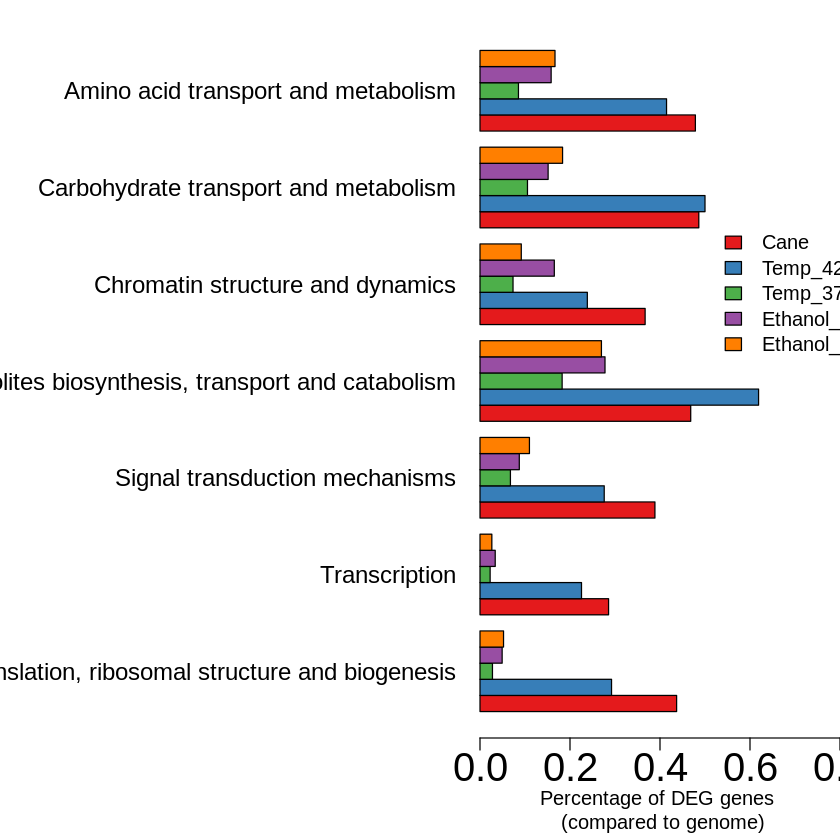

In [ ]:
slection = colnames(formated[,c(1, 2, 3, 4, 20, 24, 25)])

formated[,slection]

par(mar = c(4.25,20,1,0)) 
barplot(formated[,slection], names.arg = names(formated), horiz = T,
        col = brewer.pal(n = 5, name = "Set1"),
        las=1, xlab = "Percentage of DEG genes \n (compared to genome)", beside = T,
        cex.names = 1.2, cex.axis = 2, xlim = c(0,0.8), width= rep(3,25) ) 
legend(x = 0.5, y = 95, row.names(formated), bty = "n",
       fill = brewer.pal(n = 5, name = "Set1"), cex = 1)

,RNA processing and modification,"Replication, recombination and repair","Posttranslational modification, protein turnover, chaperones",Nucleotide transport and metabolism,Nuclear structure,Lipid transport and metabolism,"Intracellular trafficking, secretion, and vesicular transport",Inorganic ion transport and metabolism,General function prediction only,Function unknown,Extracellular structures,Energy production and conversion,Defense mechanisms,Cytoskeleton,Coenzyme transport and metabolism,Cell wall/membrane/envelope biogenesis,Cell motility,"Cell cycle control, cell division, chromosome partitioning"
Cane,0.23175966,0.50000000,0.32217573,0.45569620,0.24242424,0.4077253,0.297734628,0.42608696,0.39946738,0.26888218,0.3333333,0.4285714,0.4634146,0.431192661,0.30232558,0.44067797,NA,0.47272727
Temp_42,0.33476395,0.27551020,0.33263598,0.40506329,0.15151515,0.4463519,0.197411003,0.45217391,0.43808256,0.32024169,0.2222222,0.4775510,0.4634146,0.339449541,0.39534884,0.30508475,NA,0.28484848
Temp_37,0.01287554,0.04081633,0.03765690,0.06329114,NA,0.1330472,0.003236246,0.06956522,0.09720373,0.02416918,NA,0.1020408,0.2195122,0.009174312,0.09302326,0.06779661,NA,0.03030303
Ethanol_2%,0.01716738,0.06632653,0.08368201,0.15189873,NA,0.2103004,0.032362460,0.13913043,0.13315579,0.03625378,0.1111111,0.1306122,0.1463415,0.119266055,0.09302326,0.11864407,NA,0.15757576
Ethanol_4%,0.01716738,0.05612245,0.08995816,0.15189873,0.03030303,0.2103004,0.038834951,0.17391304,0.16644474,0.03927492,NA,0.1387755,0.1707317,0.064220183,0.11627907,0.11864407,NA,0.08484848


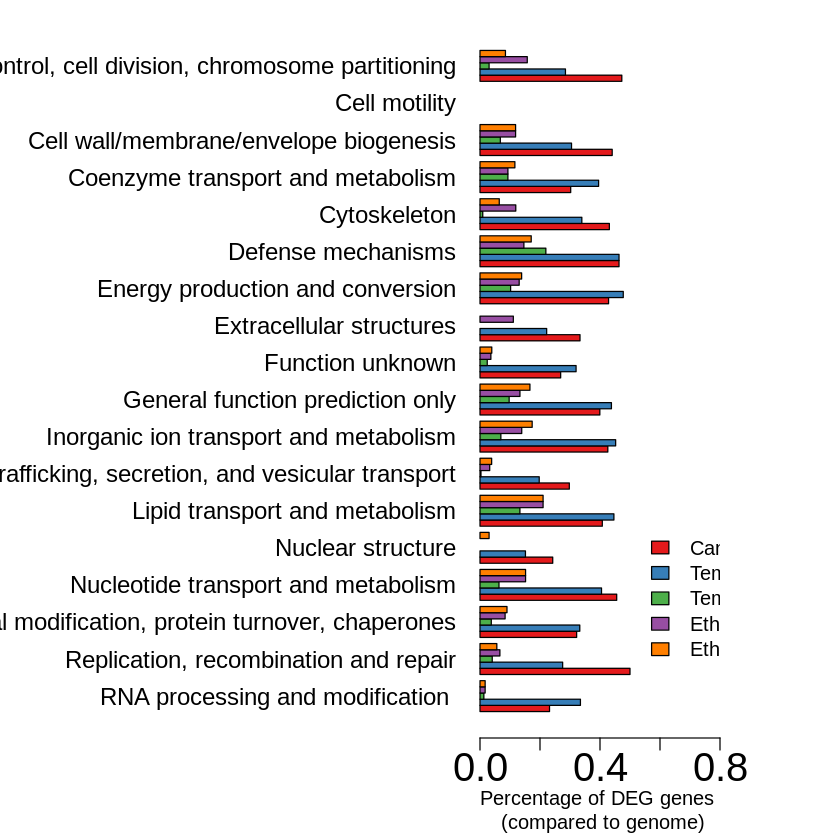

In [ ]:
slection = colnames(formated[, -1 * c(1, 2, 3, 4, 20, 24, 25)])

formated[,slection]

#x11(width = 16, height = 25)
par(mar = c(4.25,20,1,5)) 
barplot(formated[,slection], names.arg = names(formated), horiz = T,
        col = brewer.pal(n = 5, name = "Set1"),
        las=1, xlab = "Percentage of DEG genes \n (compared to genome)", beside = T,
        cex.names = 1.2, cex.axis = 2, xlim = c(0,0.8), width= rep(3,25) ) 
legend(x = 0.5, y = 95, row.names(formated), bty = "n",
       fill = brewer.pal(n = 5, name = "Set1"), cex = 1)

In [ ]:
#downloading kegg database
#kegg.gs = kegg.gsets(species = "ko", id.type = "kegg", check.new = T)$kg.sets
kegg.gs <- fromJSON(paste(readLines('aux_data/kegg_gs.json'), collapse=""))   
#reading de novo annotation from blastKOALA
koala = read.csv(file = "aux_data/annotation_kaas.tsv", header = F, sep = "\t", stringsAsFactors = T)

In [ ]:
koala <- koala[-which(duplicated(koala$V2)),]
resFC = cane["log2FoldChange"]
indexes = match(row.names(cane), koala$V1)
koala= (koala[indexes,])
lilo = cbind(resFC, koala$V2)
#row.names(lilo) = koala$V2
#lilo = lilo[lilo$"koala$V2" != "",]
lilo <- lilo[!is.na(lilo[,2]),]
row.names(lilo) = lilo[,2] 
lilo$"koala$V2" = NULL
#running
cane.kegg.p <- gage(as.matrix(lilo), gsets = kegg.gs)
#here we attempt to draw all pathways with statistically relevance confidence (from gage results)
great_p = substr(  row.names(  cane.kegg.p$greater[ (cane.kegg.p$greater[,"p.val"] <= 0.05 & 
                                                     !is.na(cane.kegg.p$greater[,"p.val"])) ,  ]  ) , 1, 7  )
less_p =  substr(  row.names(  cane.kegg.p$less[ (cane.kegg.p$less[,"p.val"] <= 0.05 & 
                                                  !is.na(cane.kegg.p$less[,"p.val"])) ,  ]  )  , 1, 7  )

In [ ]:
great_p

[1] "ko03030" "ko03010" "ko04111" "ko01230" "ko04110" "ko05012" "ko03430"
 [8] "ko00230" "ko00190" "ko05020" "ko00920" "ko03440" "ko00520" "ko04113"
[15] "ko00970" "ko05016" "ko05010" "ko01120" "ko05130" "ko04932" "ko00020"
[22] "ko00900" "ko00710"

In [ ]:
pathview(gene.data=lilo, pathway.id="ko03030", species="ko",
         low = "blue", mid = "white", high = "red")#,res = 400)

Note: Only KEGG ortholog gene ID is supported, make sure it looks like "K01488"!

Note: Mapping via KEGG gene ID (not Entrez) is supported for this species,
it looks like "K01488"!

Info: Downloading xml files for ko03030, 1/1 pathways..

Warning message in download.file(xml.url, xml.target, quiet = T):
“URL 'https://rest.kegg.jp/get/ko03030/kgml': status was 'Failure when receiving data from the peer'”
This pathway may not exist!

Info: Downloading png files for ko03030, 1/1 pathways..




![alt text](img/ko03030.pathview.png "Title")

In [ ]:
head(cane)

log2 fold change (MLE): condition time_8h vs time_0h 
Wald test p-value: condition time 8h vs time 0h 
DataFrame with 6 rows and 6 columns
      baseMean log2FoldChange     lfcSE       stat      pvalue        padj
     <numeric>      <numeric> <numeric>  <numeric>   <numeric>   <numeric>
8497   220.219       0.373965  0.212450   1.760247 7.83660e-02 1.10852e-01
8498   388.102      -0.196611  0.200182  -0.982161 3.26021e-01 3.91870e-01
8499   544.954      -1.109848  0.245112  -4.527917 5.95679e-06 1.63314e-05
8500 26920.454      -2.634547  0.204480 -12.884146 5.52843e-38 1.14862e-36
8501   324.776      -0.174531  0.309735  -0.563486 5.73104e-01 6.32559e-01
8502  1950.878      -0.695216  0.205065  -3.390217 6.98373e-04 1.44453e-03

## Example logo plot generated with [MEME Suite](https://meme-suite.org/meme/).

![alt text](img/logo1.png "Title")

## Mofif comparison


Attaching package: ‘gplots’


The following object is masked from ‘package:venn’:

    venn


The following object is masked from ‘package:IRanges’:

    space


The following object is masked from ‘package:S4Vectors’:

    space


The following object is masked from ‘package:stats’:

    lowess




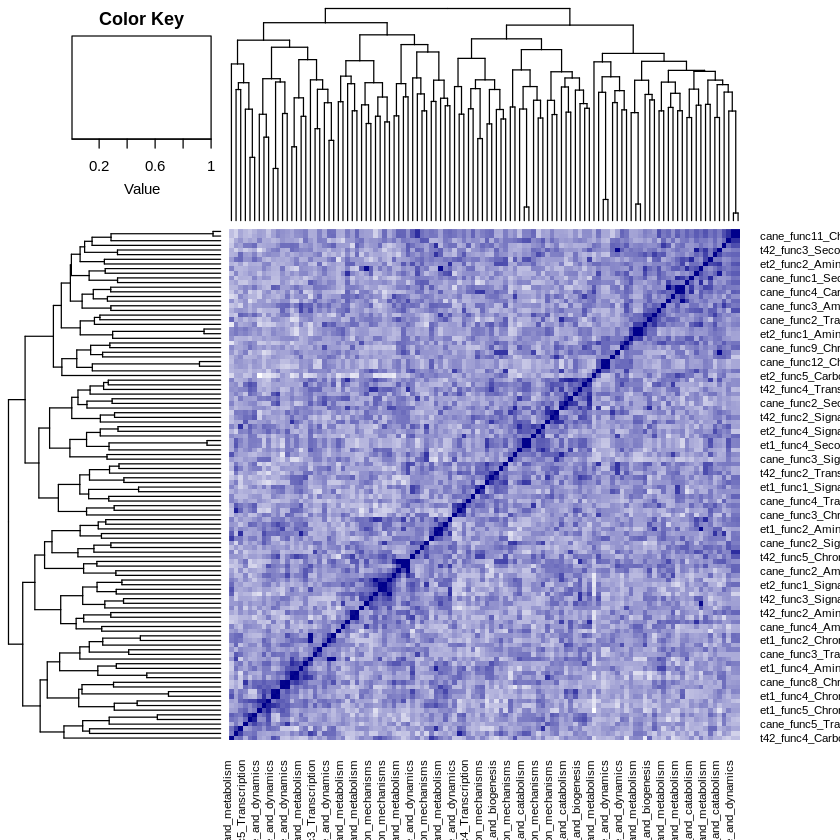

In [ ]:
library(universalmotif)

#glue = function(local = "") {
#    filess <- list.files(local)
#    files <- file.path(local, filess)
#    mm = NULL
#    cnt = 1
#    for (file in files){
#        print(file)
#        aux = read_homer( file )
#        for(i in 1:length(aux)){
#            aux[[i]]@name = paste(tail(strsplit(file,"/")[[1]], n=2)[1],i,"_",filess[cnt], sep = "")
#        }
#        cnt = cnt + 1
#        mm = c(mm, aux)
#    }
#    return(mm)
#}
#q = glue("aux_data/Promoters/homer/cane_func")
#w = c(q, glue("aux_data/Promoters/homer/t37_func"))
#e = c(w,glue("aux_data/Promoters/homer/t42_func"))
#r = c(e,glue("aux_data/Promoters/homer/et1_func"))
#t = c(r, glue("aux_data/Promoters/homer/et2_func"))
 
#y = compare_motifs(t, nthreads = 12, tryRC = T, method = "PCC", score.strat = "a.mean")
#write_meme(t, "aux_data/Promoters/homerall.meme", sep="")

t <- read_meme("aux_data/Promoters/homerall.meme")
y <- compare_motifs(t, nthreads = 12, tryRC = T, method = "PCC", score.strat = "a.mean")

library(gplots)
my_palette <- colorRampPalette(c("white",  "darkblue"))(n = 1000)
heatmap.2(y, col = my_palette, trace = "none", density.info = "none")